In [44]:
import itertools
import numpy as np
from scipy.stats import beta, binom

In [2]:
def choose(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

# Chapter 1: 

# Chapter 2: 

## Q1.
What is the probability of rolling two six-sided dice and getting a 
value greater than 7?

In [3]:
combinations = list(itertools.product(range(1,7),range(1,7))) #itertools.product returns the cartesian product of two iterables
combinations

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [4]:
greater_7 = [sum(i) for i in combinations if sum(i) > 7]

In [5]:
print(f"Number of pairs with values greater than 7:  {len(greater_7)}")
print(f"Total number of pairs: {len(combinations)}")
print(f"P(>7)={round(len(greater_7)/len(combinations),2)}")

Number of pairs with values greater than 7:  15
Total number of pairs: 36
P(>7)=0.42


## Q2.
What is the probability of rolling three six-sided dice and getting a 
value greater than 7?

In [6]:
combinations_3dice = list(itertools.product(range(1,7),range(1,7),range(1,7)))
greater_7_3dice = [sum(i) for i in combinations_3dice if sum(i) > 7]

In [7]:
print(f"Number of pairs with values greater than 7:  {len(greater_7_3dice)}")
print(f"Total number of pairs: {len(combinations_3dice)}")
print(f"P(>7)={round(len(greater_7_3dice)/len(combinations_3dice),2)}")

Number of pairs with values greater than 7:  181
Total number of pairs: 216
P(>7)=0.84


## Q3.
The Yankees are playing the Red Sox. You’re a diehard Sox fan and 
bet your friend they’ll win the game. You’ll pay your friend 30 dollars if the Sox 
lose and your friend will have to pay you only 5 dollars if the Sox win. What is 
the probability you have intuitively assigned to the belief that the Red Sox 
will win?

In [8]:
odds_RSwin = 30/5
prob_RSwin = odds_RSwin/(1+odds_RSwin)
round(prob_RSwin,2)

0.86

# Chapter 3: The Logic of Uncertainty
## Q1. 
What is the probability of rolling a 20 three times in a row on a 
20-sided die?

In [9]:
(1/20)**3 # or (1/20)*(1/20)*(1/20)

0.00012500000000000003

## Q2. 
The weather report says there’s a 10 percent chance of rain tomorrow, 
and you forget your umbrella half the time you go out. What is the probability that you’ll be caught in the rain without an umbrella tomorrow?

In [10]:
p_rain = 0.1
p_umbrella = 0.5
p_rain*p_umbrella

0.05

## Q3. 
Raw eggs have a 1/20,000 probability of having salmonella. If you eat 
two raw eggs, what is the probability you ate a raw egg with salmonella?

In [11]:
1/20000 + 1/20000 #given that they are independent

0.0001

In [12]:
round(1/20000 + 1/20000 - 1/20000 * (1/20000),5) #more formally correct

0.0001

## Q4. 
What is the probability of either flipping two heads in two coin tosses 
or rolling three 6s in three six-sided dice rolls?

In [13]:
p_two_heads = 0.5 * 0.5
p_three_six = (1/6)*(1/6)*(1/6)
p_either_event = p_two_heads + p_three_six
round(p_either_event,2)

0.25

# Chapter 4: Creating a Binomial Probability Distribution
## Q1. 
What are the parameters of the binomial distribution for the probability of rolling either a 1 or a 20 on a 20-sided die, if we roll the die 
12 times?

In [14]:
p = 1/20 + 1/20 #prob of either 1 or 20
k = 1 #looking for event to occur once
n = 12 # 12 trials

## Q2. 
There are four aces in a deck of 52 cards. If you pull a card, return 
the card, then reshuffle and pull a card again, how many ways can you pull 
just one ace in five pulls?

In [15]:
choose(5,1)

5

## Q3. 
For the example in question 2, what is the probability of pulling five 
aces in 10 pulls (remember the card is shuffled back in the deck when it is 
pulled)?

In [16]:
k = 5
n = 10
p = 4/52
binom.pmf(k,n,p)

0.0004548552879040868

## Q4. 
When you’re searching for a new job, it’s always helpful to have more 
than one offer on the table so you can use it in negotiations. If you have a 
1/5 probability of receiving a job offer when you interview, and you interview with seven companies in a month, what is the probability you’ll have 
at least two competing offers by the end of that month?

In [17]:
p_offer = 1/5
n = 7
p_two_or_more_7 = binom.cdf(7,n,p_offer)-binom.cdf(1,n,p_offer) #prob from 2 offers to 7 offers
p_two_or_more_7

0.42328319999999986

## Q5. 
You get a bunch of recruiter emails and find out you have 25 interviews lined up in the next month. Unfortunately, you know this will leave 
you exhausted, and the probability of getting an offer will drop to 1/10 
if you’re tired. You really don’t want to go on this many interviews unless 
you are at least twice as likely to get at least two competing offers. Are you 
more likely to get at least two offers if you go for 25 interviews, or stick to 
just 7?

In [18]:
n_interview = 25
p_offer_tired = 1/10
p_two_or_more_25 = binom.cdf(7,n_interview,p_offer_tired)-binom.cdf(1,n_interview,p_offer_tired)
p_two_or_more_25

0.7265327819658538

In [19]:
p_two_or_more_25/p_two_or_more_7

1.7164224376631392

Only 1.7 times more likely to get an offer not twice.

# Chapter 5: The Beta Distribution
## Q1. 
You want to use the beta distribution to determine whether or not a
coin you have is a fair coin—meaning that the coin gives you heads and
tails equally. You flip the coin 10 times and get 4 heads and 6 tails. Using
the beta distribution, what is the probability that the coin will land on
heads more than 60 percent of the time?

In [20]:
betacdf = beta(4,6).cdf

betacdf(1.0) - betacdf(0.6)

0.09935257600000003

## Q2. 
You flip the coin 10 more times and now have 9 heads and 11 tails
total. What is the probability that the coin is fair, using our definition of
fair, give or take 5 percent?

In [21]:
betacdf = beta(9,11).cdf

betacdf(0.55) - betacdf(0.45)

0.3098800156513042

## Q3. 
Data is the best way to become more confident in your assertions. You
flip the coin 200 more times and end up with 109 heads and 111 tails. Now
what is the probability that the coin is fair, give or take 5 percent?

In [22]:
betacdf = beta(109,111).cdf

betacdf(0.55) - betacdf(0.45)

0.8589371426532354

# Chapter 6: Conditional Probability
## Q1. 
What piece of information would we need in order to use Bayes’
theorem to determine the probability that someone in 2010 who had GBS
also had the flu vaccine that year?

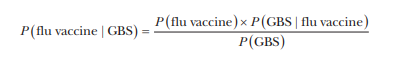

## Q2. 
What is the probability that a random person picked from the
population is female and is not color blind?

In [23]:
p_female = 0.5
p_colorblind_given_f = 0.005
p_notcolorblind_female = p_female*(1-p_colorblind_given_f)
p_notcolorblind_female

0.4975

## Q3. 
What is the probability that a male who received the flu vaccine in
2010 is either color blind or has GBS?

In [24]:
p_GBS_given_fvac = 3/100000
p_colorblind_given_m = 0.08
p_male = 0.5
p_male_and_colorblind = p_colorblind_given_m * p_male #gives 0.04 not 0.004 as described in book solutions.

p_male_and_colorblind + p_GBS_given_fvac - p_male_and_colorblind * p_GBS_given_fvac

0.0400288

# Chapter 7: Bayes' Theorem with LEGO

## Q1.
Kansas City, despite its name, sits on the border of two US states: 
Missouri and Kansas. The Kansas City metropolitan area consists of 
15 counties, 9 in Missouri and 6 in Kansas. The entire state of Kansas has 
105 counties and Missouri has 114. Use Bayes’ theorem to calculate the 
probability that a relative who just moved to a county in the Kansas City 
metropolitan area also lives in a county in Kansas. Make sure to show 
P(Kansas) (assuming your relative lives either in Kansas or Missouri), 
P(Kansas City metropolitan area), and P(Kansas City metropolitan area | 
Kansas).

In [25]:
kansas_counties = 105
missouri_counties = 114
p_kc_kansas = 6/105
p_kc_missouri = 9/114
total_counties = kansas_counties + missouri_counties

p_kansas_kc = (p_kc_kansas*(kansas_counties/total_counties))/(15/total_counties)
p_kansas_kc

0.4

## Q2
A deck of cards has 52 cards with suits that are either red or black. 
There are four aces in a deck of cards: two red and two black. You remove a red ace from the deck and shuffle the cards. Your friend pulls a black card. What is the probability that it is an ace?

In [26]:
p_ace_black_1 = 2/26 # = 1/13;already the answer will use bayes theorem however

p_ace = 3/51
p_black_ace = 2/3 #p(black card given ace)
p_black = 26/51


p_ace_black_2 = (p_black_ace*p_ace)/p_black

print(p_ace_black_1 == p_ace_black_2)
print(p_ace_black_2)

True
0.07692307692307693


# Chapter 8:The Prior, Likelihood, and Posterior of Bayes’ Theorem
## Q1. 
As mentioned, you might disagree with the our original probability 
assigned to the likelihood: 

P(broken window, open front door, missing laptop | robbed) = 3/10

How much does this change our strength in believing H1 over H2?

 *fill*

## Q2. 
How unlikely would you have to believe being robbed is—our prior 
for H1—in order for the ratio of H1 to H2 to be even?

In [27]:
((1/(1000*6570))*(3/10))/(1/21900000) # for P(D|H1)=3/10 (value before Q1)

1.0

In [28]:
((1/(1000*657))*(3/100))/(1/21900000)# for P(D|H1)=3/100 (value after Q1)

1.0

# Chapter 9: Bayesian Priors and Working with Probability Distributions
## Q1. 
A friend finds a coin on the ground, flips it, and gets six heads in a 
row and then one tails. Give the beta distribution that describes this. 
Use integration to determine the probability that the true rate of flipping 
heads is between 0.4 and 0.6, reflecting that the coin is reasonably fair.

In [34]:
beta_coin = beta(6,1).cdf
round((beta_coin(0.6)-beta_coin(0.4)),5)

0.04256

## Q2. 
Come up with a prior probability that the coin is fair. Use a beta 
distribution such that there is at least a 95 percent chance that the true 
rate of flipping heads is between 0.4 and 0.6.

In [40]:
fair_prior = 55 # 55 gives around 95%, 100 gives over 99%
beta_fair = beta(6+fair_prior,1+fair_prior).cdf
round((beta_fair(0.6)-beta_fair(0.4)),5)

0.95275

## Q3. 
Now see how many more heads (with no more tails) it would take to 
convince you that there is a reasonable chance that the coin is not fair. In 
this case, let’s say that this means that our belief in the rate of the coin 
being between 0.4 and 0.6 drops below 0.5.

In [43]:
add_head = range(0,30,5)
for i in add_head:
    beta_notfair = beta(6+fair_prior+i,1+fair_prior).cdf
    print(f"Additional heads: {i} ; belief in rate between 0.4 and 0.6: {round((beta_notfair(0.6)-beta_notfair(0.4)),5)}")

Additional heads: 0 ; belief in rate between 0.4 and 0.6: 0.95275
Additional heads: 5 ; belief in rate between 0.4 and 0.6: 0.90469
Additional heads: 10 ; belief in rate between 0.4 and 0.6: 0.8232
Additional heads: 15 ; belief in rate between 0.4 and 0.6: 0.71113
Additional heads: 20 ; belief in rate between 0.4 and 0.6: 0.5785
Additional heads: 25 ; belief in rate between 0.4 and 0.6: 0.44077


# Chapter 10: Introduction to Averaging and Parameter Estimation
## Q1. 
It’s possible to get errors that don’t quite cancel out the way we want. 
In the Fahrenheit temperature scale, 98.6 degrees is the normal body temperature and 100.4 degrees is the typical threshold for a fever. Say you are taking care of a child that feels warm and seems sick, but you take 
repeated readings from the thermometer and they all read between 99.5 
and 100.0 degrees: warm, but not quite a fever. You try the thermometer 
yourself and get several readings between 97.5 and 98. What could be 
wrong with the thermometer?

The thermometer seems to measure incorrectly. It seems to measure about 1°F below the actual temperature.

## Q2. 
Given that you feel healthy and have traditionally had a very consistently normal temperature, how could you alter the measurements 100, 99.5, 99.6, and 100.2 to estimate if the child has a fever?

Add 1°F in accordance with the biased measurement to attain the actual temperature. This results in 101,100.5,100.6,101.2 which all lie above the 100.4 fever threshold.

# Chapter 11: Measuring the Spread of Our Data
## Q1. 
One of the benefits of variance is that squaring the differences makes 
the penalties exponential. Give some examples of when this would be a 
useful property.

Whenever we have strong outliers (very small or very large values) that are important to our observations/data this property is useful. E.g. if we want to penalize the lateness of a student it might not make much of a difference if the student is 2minutes late, if she however is 200mins late she missed the whole class which is far worse.

## Q2. 
Calculate the mean, variance, and standard deviation for the 
following values: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

In [51]:
#calculations from scratch without the explicit numpy functions to show the formulas
def scratch_mean(x)->float:
    return sum(x)/len(x)
def scratch_var(x)->float:
    return sum([(i-scratch_mean(x))**2 for i in x])/len(x)
def scratch_sd(x)->float:
    return np.sqrt(scratch_var(x))

In [52]:
q2_values = [1,2,3,4,5,6,7,8,9,10]

print(f"Mean: {scratch_mean(q2_values)}")
print(f"Variance: {scratch_var(q2_values)}")
print(f"SD: {scratch_sd(q2_values)}")

Mean: 5.5
Variance: 8.25
SD: 2.8722813232690143
